# Netflix Show EDA 

## Import Stuff

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Data

In [2]:
data = pd.read_csv("./data/netflix_titles.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Explore Data

In [3]:
data.shape

(8807, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


##  Some Insights From Data and Set Goals
1. ### Movies and TV show trend country wise and cleaning data for this

In [5]:
movies = data[data.type == 'Movie' ]
tv_shows = data[data.type == 'TV Show']
movies_country = movies["country"]
tv_shows_country = tv_shows['country']
                



In [6]:
movies.shape

(6131, 12)

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6131 non-null   object
 1   type          6131 non-null   object
 2   title         6131 non-null   object
 3   director      5943 non-null   object
 4   cast          5656 non-null   object
 5   country       5691 non-null   object
 6   date_added    6131 non-null   object
 7   release_year  6131 non-null   int64 
 8   rating        6129 non-null   object
 9   duration      6128 non-null   object
 10  listed_in     6131 non-null   object
 11  description   6131 non-null   object
dtypes: int64(1), object(11)
memory usage: 622.7+ KB


In [8]:
movies_country = movies_country.dropna() # movies data cleaning
movies_country
tv_shows_country = tv_shows_country.dropna() # tv shows data cleaning

### Counry row set but not duplicate

In [9]:
# count value of every unique values
movies_country = movies_country.value_counts()[:11]
tv_shows_country = tv_shows_country.value_counts()[:11]
movies_country
tv_shows_country

United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Australia          48
Spain              48
Mexico             40
Name: country, dtype: int64

2. ### Year on year tv shows and movies

In [10]:
movies_year = movies[['show_id', 'type', 'date_added']]
# movies_year.groupby('release_year')['type'].nunique()
movies_year.loc['date_added'] = pd.to_datetime(movies_year['date_added'])
movies_year = movies_year.dropna()
movies_year.info()
### IGNOER WARNING MESSAGE FOR NOW ###

<class 'pandas.core.frame.DataFrame'>
Index: 6131 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   show_id     6131 non-null   object
 1   type        6131 non-null   object
 2   date_added  6131 non-null   object
dtypes: object(3)
memory usage: 191.6+ KB


/tmp/ipykernel_19727/3059611312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_year.loc['date_added'] = pd.to_datetime(movies_year['date_added'])


In [11]:
movies_year.date_added = pd.DatetimeIndex(movies_year['date_added']).year
movies_year

,show_id,type,date_added
0,s1,Movie,2021
6,s7,Movie,2021
7,s8,Movie,2021
9,s10,Movie,2021
12,s13,Movie,2021
...,...,...,...
8801,s8802,Movie,2016
8802,s8803,Movie,2019
8804,s8805,Movie,2019
8805,s8806,Movie,2020


#### __Add unique values but not in increasing order very very importnant__

In [12]:
movies_year = movies_year.groupby('date_added')['show_id'].nunique()
movies_year

date_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     253
2017     839
2018    1237
2019    1424
2020    1284
2021     993
Name: show_id, dtype: int64

In [17]:
type(movies_year)

pandas.core.series.Series

### Movies and tv shows with year  **** COMPLICATED****

In [24]:
movies_tv_shows = data[['type','date_added']].dropna()
movies_tv_shows.date_added = pd.DatetimeIndex(movies_tv_shows['date_added']).year
movies_tv_shows = pd.DataFrame(movies_tv_shows.groupby(['date_added', 'type']).size()) ### COMPLICATED
movies_tv_shows

0
date_added type         
2008       Movie       1
           TV Show     1
2009       Movie       2
2010       Movie       1
2011       Movie      13
2012       Movie       3
2013       Movie       6
           TV Show     5
2014       Movie      19
           TV Show     5
2015       Movie      56
           TV Show    26
2016       Movie     253
           TV Show   176
2017       Movie     839
           TV Show   349
2018       Movie    1237
           TV Show   412
2019       Movie    1424
           TV Show   592
2020       Movie    1284
           TV Show   595
2021       Movie     993
           TV Show   505

In [28]:
movies_tv_shows = movies_tv_shows.rename(columns={0: 'count'})
movies_tv_shows = movies_tv_shows.reset_index().set_index('date_added')
movies_tv_shows.head()

,type,count
date_added,,
2008,Movie,1
2008,TV Show,1
2009,Movie,2
2010,Movie,1
2011,Movie,13


## Some Important Points from Data

#### 1. Total 651 countries data are give in movie wise after cleaning. But We will do top 10 countries movie wise

## Data Visualization

### Top 10 country in Movies

<Axes: title={'center': 'Top 10 Countries in Movies in Netflix'}, xlabel='Number of Movies till 2020', ylabel='Country'>

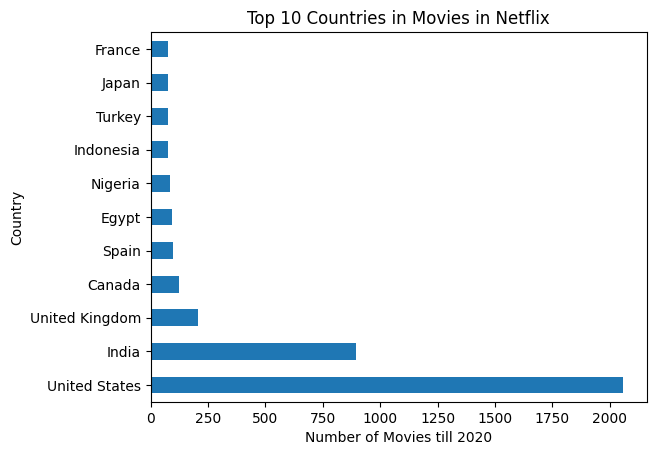

In [13]:
movies_country.plot.barh(title="Top 10 Countries in Movies in Netflix", xlabel="Number of Movies till 2020", ylabel="Country")

### Top 10 Countries in TV Shows

<Axes: title={'center': 'Top 10 Countries in TV Shows in Netflix'}, xlabel='Number of TV Shows till 2020', ylabel='Country'>

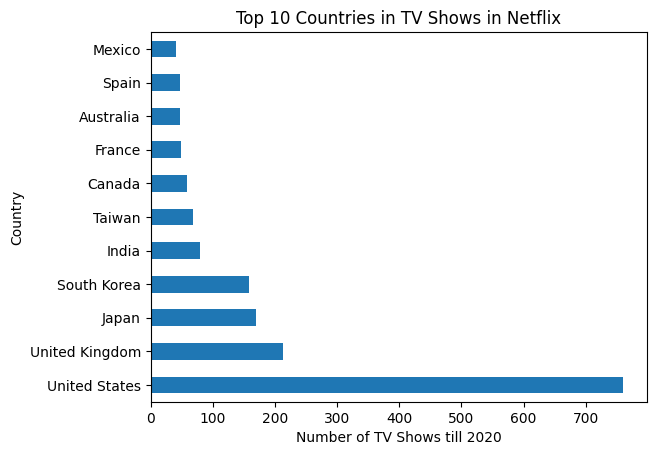

In [14]:
tv_shows_country.plot.barh(title="Top 10 Countries in TV Shows in Netflix", xlabel="Number of TV Shows till 2020", ylabel="Country")

## Movies Added Trend in Netflix in 2008 to 2021

<Axes: xlabel='date_added'>

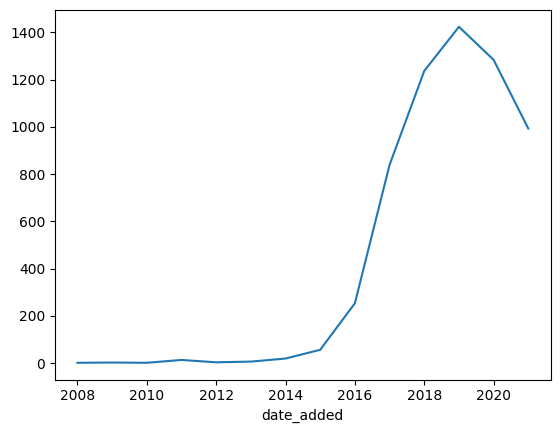

In [15]:
movies_year.plot()

## Trend of movies and 

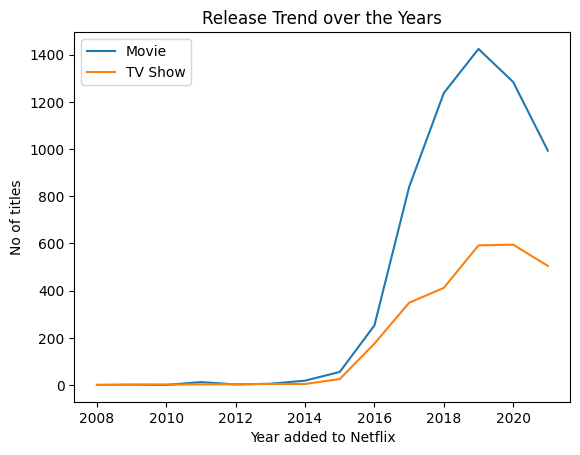

In [29]:
# Create a new figure and axes
fig, ax = plt.subplots()

# Filter the DataFrame by 'Movie' type and plot the data
movies_tv_shows[movies_tv_shows['type'] == 'Movie'].plot(ax=ax, y='count', label='Movie')

# Filter the DataFrame by 'TV Show' type and plot the data on the same axes
movies_tv_shows[movies_tv_shows['type'] == 'TV Show'].plot(ax=ax, y='count', label='TV Show')

# Add a legend to the plot
ax.legend()

plt.ylabel('No of titles')
plt.xlabel('Year added to Netflix')

plt.title('Release Trend over the Years')

# Show the plot
plt.show()